In [108]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Que 3


Implement full-batch, mini-batch and stochastic gradient descent. Calculate the average number of iterations required for each method to get sufficiently close to the optimal solution, where "sufficiently close" means within a distance of ϵ(or ϵ-neighborhood) from the minimum value of the loss function.Visualize the convergence process for 15 epochs. Choose ϵ=0.001for convergence criteria. Which optimization process takes a larger number of epochs to converge, and why? Show the contour plots for different epochs (or show an animation/GIF) for visualisation of optimisation process. Also, make a plot for Loss v/s epochs for all the methods. 

### Which Optimization process takes larger number of epochs to converge and why ?? 


In full-batch gradient descent, a single large step is taken after accurately calculating the net gradient for all parameters across the entire dataset. In mini-batch gradient descent, steps are taken for smaller batches of the dataset, allowing for more frequent updates. In contrast, in stochastic gradient descent (SGD), the gradient is updated after every iteration, based on individual data points. Although the step size in SGD is small, the number of updates (or steps) per epoch is significantly higher, leading to more frequent updates. Consequently, the total number of epochs required for convergence tends to be the lowest in SGD, as the parameters are continuously updated throughout the process and they converges towards the minima.


In Stochastic Gradient Descent (SGD), the model is updated one sample at a time, resulting in **n** small steps per epoch, where **n** is the total number of samples in the dataset. In contrast, full-batch gradient descent updates the model using all **n** samples at once, so there is only **one large step** per epoch. Mini-batch gradient descent strikes a balance by dividing the dataset into batches of size **b**, updating the model using **b** samples at a time, which results in **n/b** steps per epoch. Here, **b** represents the batch size.


**Full Batch** will take the maximum number of epochs to reach the convergence because it take one single large step over the whole dataset. So number of updates are same as the number of epochs.



## Full Batch

In [109]:
import numpy as np

def gradient_full_batch(X, y, epochs, alpha=0.001, thresh=0.001):
    # N is number of features in X and d is the number of samples 

    N = X.shape[1]
    d = X.shape[0]

    params = []

    theta = np.array([9.8, -10.494])
    
    y_pred = X @ theta

    J_theta = float('inf')

    losses = []
    iters = 0
    for epoch in range(1, epochs+1):
        if J_theta < thresh:
            params.append(theta.copy())  # Append a copy of theta
            losses.append(J_theta)
            print("Iterations of Full batch GD: ", iters)
            print("Epochs of Full batch GD: ", epoch)
            return params, losses, iters
        

        params.append(theta.copy())  # Append a copy of theta
        losses.append(J_theta)

        if J_theta > thresh:
            iters += 1

        y_pred = X @ theta

        gradient = (1 / d) * (X.T @ (y_pred - y))
        
        theta -= alpha * gradient
    
        J_theta = (1 / (2 * d)) * np.sum((X @ theta - y) ** 2)

    print("Iterations of Full batch GD: ", iters)
    print("Epochs of Full batch GD: ", epoch)
    
    return params, losses, iters


## Mini Batch

In [130]:
# def create_batches(X,y,num_batches):
#     batch_size = X.shape[0] // num_batches
#     indices = np.random.permutation(X.shape[0])
#     X_shuffled = X[indices]
#     y_shuffled = y[indices]

#     mini_batches = []
#     for i in range(0,X.shape[0],batch_size):
#         mini_batches.append((X_shuffled[i:i+batch_size],y_shuffled[i:i+batch_size]))

#     return mini_batches


def create_batches(X, y, num_batches):
    # indices = np.random.permutation(X.shape[0])
    # X_shuffled = X[indices]
    # y_shuffled = y[indices]
    X_shuffled = X
    y_shuffled = y

    batch_size = X.shape[0]//num_batches
    
    X_batches = np.array_split(X_shuffled[:num_batches * batch_size], num_batches)
    y_batches = np.array_split(y_shuffled[:num_batches * batch_size], num_batches)
    
    if X.shape[0] % batch_size != 0:
        X_batches.append(X_shuffled[num_batches * batch_size:])
        y_batches.append(y_shuffled[num_batches * batch_size:])
    
    mini_batches = list(zip(X_batches, y_batches))
    
    return mini_batches

In [131]:
def gradient_mini_batch(X,  y, num_batch, epochs, alpha = 0.001, thresh = 0.001):
    # N is number of features in X and d is the number of samples 

    N = X.shape[1]
    d = X.shape[0]

    params = []
    theta = np.array([9.8, -10.494])

    losses = []
    iters = 0
    J_theta = float('inf')

    for epoch in range(1,epochs):
        params.append(theta.copy())  # Append a copy of theta
        losses.append(J_theta)

        if J_theta < thresh:
            print("Iterations of Mini batch GD: ", iters)
            print("Epochs of Mini batch GD: ", epoch)
            return params, losses, iters

        batches = create_batches(X,y,num_batch)
        for batch in batches: 
            iters+=1              
            x_b = batch[0]
            y_b = batch[1]

            y_hat_b = x_b @ theta
            gradient = (1 / d) * (x_b.T @ (y_hat_b - y_b))
            theta -= alpha * gradient


        J_theta = (1 / (2 * d)) * np.sum((X @ theta - y) ** 2)

    print("Iterations of Mini batch GD: ", iters)
    print("Epochs of Mini batch GD: ", epoch)
    
    return params, losses , iters

        

## Stochastic 

In [112]:
def gradient_SGD(X, y, epochs, alpha=0.001,thresh = 0.001):
    N = X.shape[1]  # Number of features
    d = X.shape[0]  # Number of samples

    params = []
    theta = np.array([9.8, -10.494])

    losses = []
    iters = 0

    J_theta = float('inf')

    for epoch in range(1,epochs):
        params.append(theta.copy())  # Append a copy of theta
        losses.append(J_theta)
        for i in range(d):

            if J_theta > thresh:
                iters += 1


            if J_theta < thresh:
                print("Iterations of SGD: ", iters)
                print("Epochs of SGD: ", epoch)
                return params, losses, iters

            x_i = X[i:i+1]
            y_i = y[i:i+1]
            
            y_hat_i = x_i @ theta
            
            gradient = (x_i.T @ (y_hat_i - y_i))
            
            theta -= alpha * gradient

            J_theta = (1 / (2 * d)) * np.sum((X @ theta - y) ** 2)

    print("Iterations of SGD: ", iters)
    print("Epochs of SGD: ", epoch)
    return params, losses,iters

## Comparison

In [113]:
def make_data(noise=0.3, degree=1, num_samples=100, random_state=42):
    # Set the random seed for reproducibility
    if random_state:
        np.random.seed(random_state)


    # Create X 
    X = np.linspace(-1, 1, num_samples)
    
    # Initialize the coefficients
    coeffs = np.random.randn(degree + 1)
    
    # Calculate the 
    y = np.polyval(coeffs, X)
    
    y += np.random.normal(scale=noise, size=y.shape)
    
    X = X.reshape(-1, 1)
    
    return X, y


In [114]:
# prepare the data using make data function
X, y = make_data(noise=0.02  , degree=1, num_samples=200, random_state=42)

# Concatenate the rows of ones to the data
X = np.concatenate([np.ones((X.shape[0],1)),X],axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

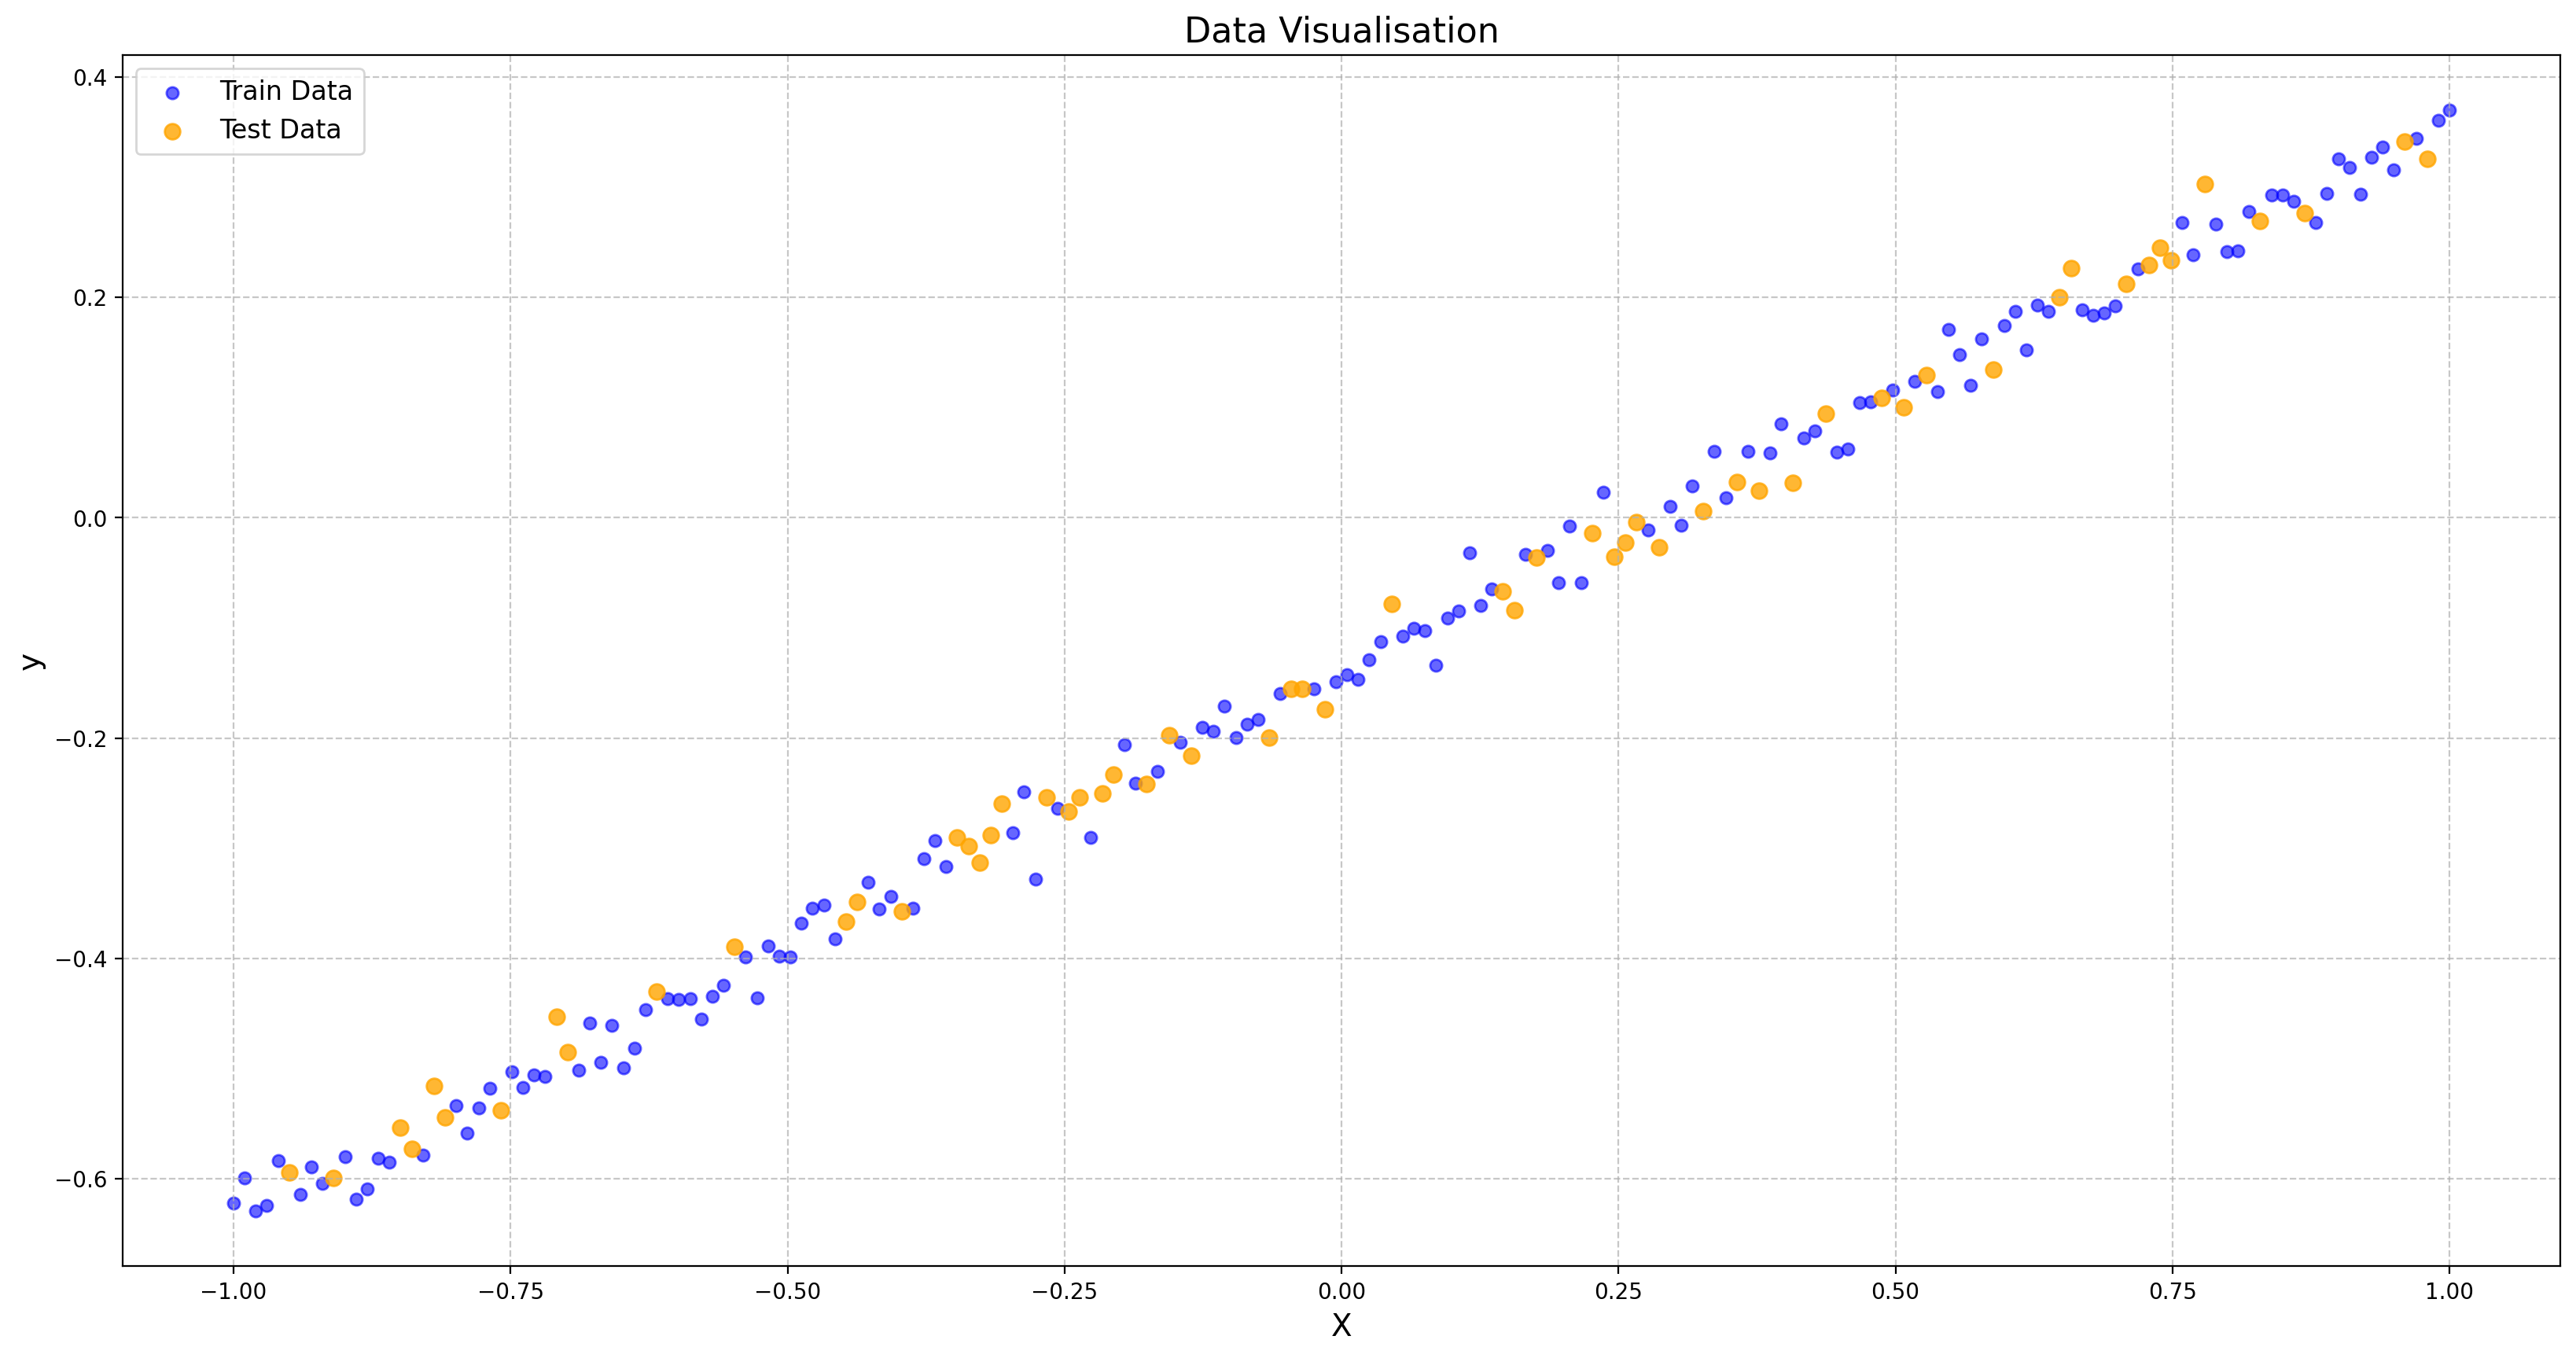

In [115]:
plt.figure(figsize=(20, 10))
plt.scatter(X_train[:, 1], y_train, s=30, label="Train Data", color='blue', alpha=0.6)
plt.scatter(X_test[:, 1], y_test, s=50, label="Test Data", color='orange', alpha=0.8)
plt.title("Data Visualisation", fontsize=16)
plt.xlabel("X", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()

In [132]:
epochs = 50000
epsilon = 0.001

num_batch = 50

full_grad_thetas,full_grad_losses,full_grad_iters = gradient_full_batch(X_train,y_train,epochs,alpha=0.001,thresh=epsilon)

mini_grad_thetas,mini_grad_losses,mini_grad_iters = gradient_mini_batch(X_train,y_train,num_batch,epochs,alpha=0.001,thresh=epsilon)

sgd_grad_thetas,sgd_grad_losses,sgd_grad_iters = gradient_SGD(X_train,y_train,epochs,alpha=0.001,thresh=epsilon)

print(len(full_grad_thetas))
print(len(mini_grad_thetas))
print(len(sgd_grad_thetas))


Iterations of Full batch GD:  14196
Epochs of Full batch GD:  14197
Iterations of Mini batch GD:  968300
Epochs of Mini batch GD:  19367
Iterations of SGD:  14179
Epochs of SGD:  102
14197
19367
102


In [116]:


def compute_cost(X, y, theta):
    m = len(y)
    predictions = X @ theta
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost


def plot_contours(thetas_arr, X, y, limit=None):
    # Convert thetas_arr to a NumPy array if it isn't already
    thetas_arr = np.array(thetas_arr)
    
    # Calculate the min and max for theta0 and theta1 from the thetas array
    theta0_min, theta0_max = -1 * np.max(np.abs(thetas_arr[:, 0])), np.max(np.abs(thetas_arr[:, 0]))
    theta1_min, theta1_max = -1 * np.max(np.abs(thetas_arr[:, 1])), np.max(np.abs(thetas_arr[:, 1]))

    theta0_vals = np.linspace(theta0_min, theta0_max, 100)
    theta1_vals = np.linspace(theta1_min, theta1_max, 100)

    # Determine how many plots to create
    total_plots = 15
    indices = np.linspace(0, len(thetas_arr) - 1, total_plots, dtype=int)
    # indices = np.linspace(0, 75, total_plots, dtype=int)

    # Create a figure with 5 rows and 3 columns
    fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 20))
    fig.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust spacing between plots

    # Calculate J_vals once to determine the global min and max for coloring
    J_vals_all = np.zeros((len(theta0_vals), len(theta1_vals)))
    for i, theta0 in enumerate(theta0_vals):
        for k, theta1 in enumerate(theta1_vals):
            t = np.array([theta0, theta1])
            J_vals_all[i, k] = compute_cost(X, y, t)

    J_vals_all = J_vals_all.T
    vmin, vmax = np.min(J_vals_all), np.max(J_vals_all)

    for idx, j in enumerate(indices):
        theta = thetas_arr[j]
        J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

        # Calculate the cost function values for each theta combination
        for i, theta0 in enumerate(theta0_vals):
            for k, theta1 in enumerate(theta1_vals):
                t = np.array([theta0, theta1])
                J_vals[i, k] = compute_cost(X, y, t)

        J_vals = J_vals.T

        # Get the current axis
        ax = axes[idx // 3, idx % 3]

        # Plot the contour with consistent color scaling
        contour = ax.contourf(theta0_vals, theta1_vals, J_vals, levels=50, cmap='plasma', alpha=0.8, vmin=vmin, vmax=vmax)
        ax.scatter(theta[0], theta[1], color='red', marker='x', s=100, linewidth=2)
        
        # Mark the minima with horizontal and vertical lines
        ax.axhline(y=theta[1], color='red', linestyle='--', alpha=0.7)
        ax.axvline(x=theta[0], color='red', linestyle='--', alpha=0.7)
        
        # Add plot details
        ax.set_title(f'Epoch {j + 1}', fontsize=14, fontweight='bold')
        ax.set_xlabel('Theta 0', fontsize=12)
        ax.set_ylabel('Theta 1', fontsize=12)
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)

        

    # Add a global title for all subplots
    fig.suptitle('Contour Plots Over 15 Epochs', fontsize=16, fontweight='bold')

    # Display the plot
    plt.show()
       
        


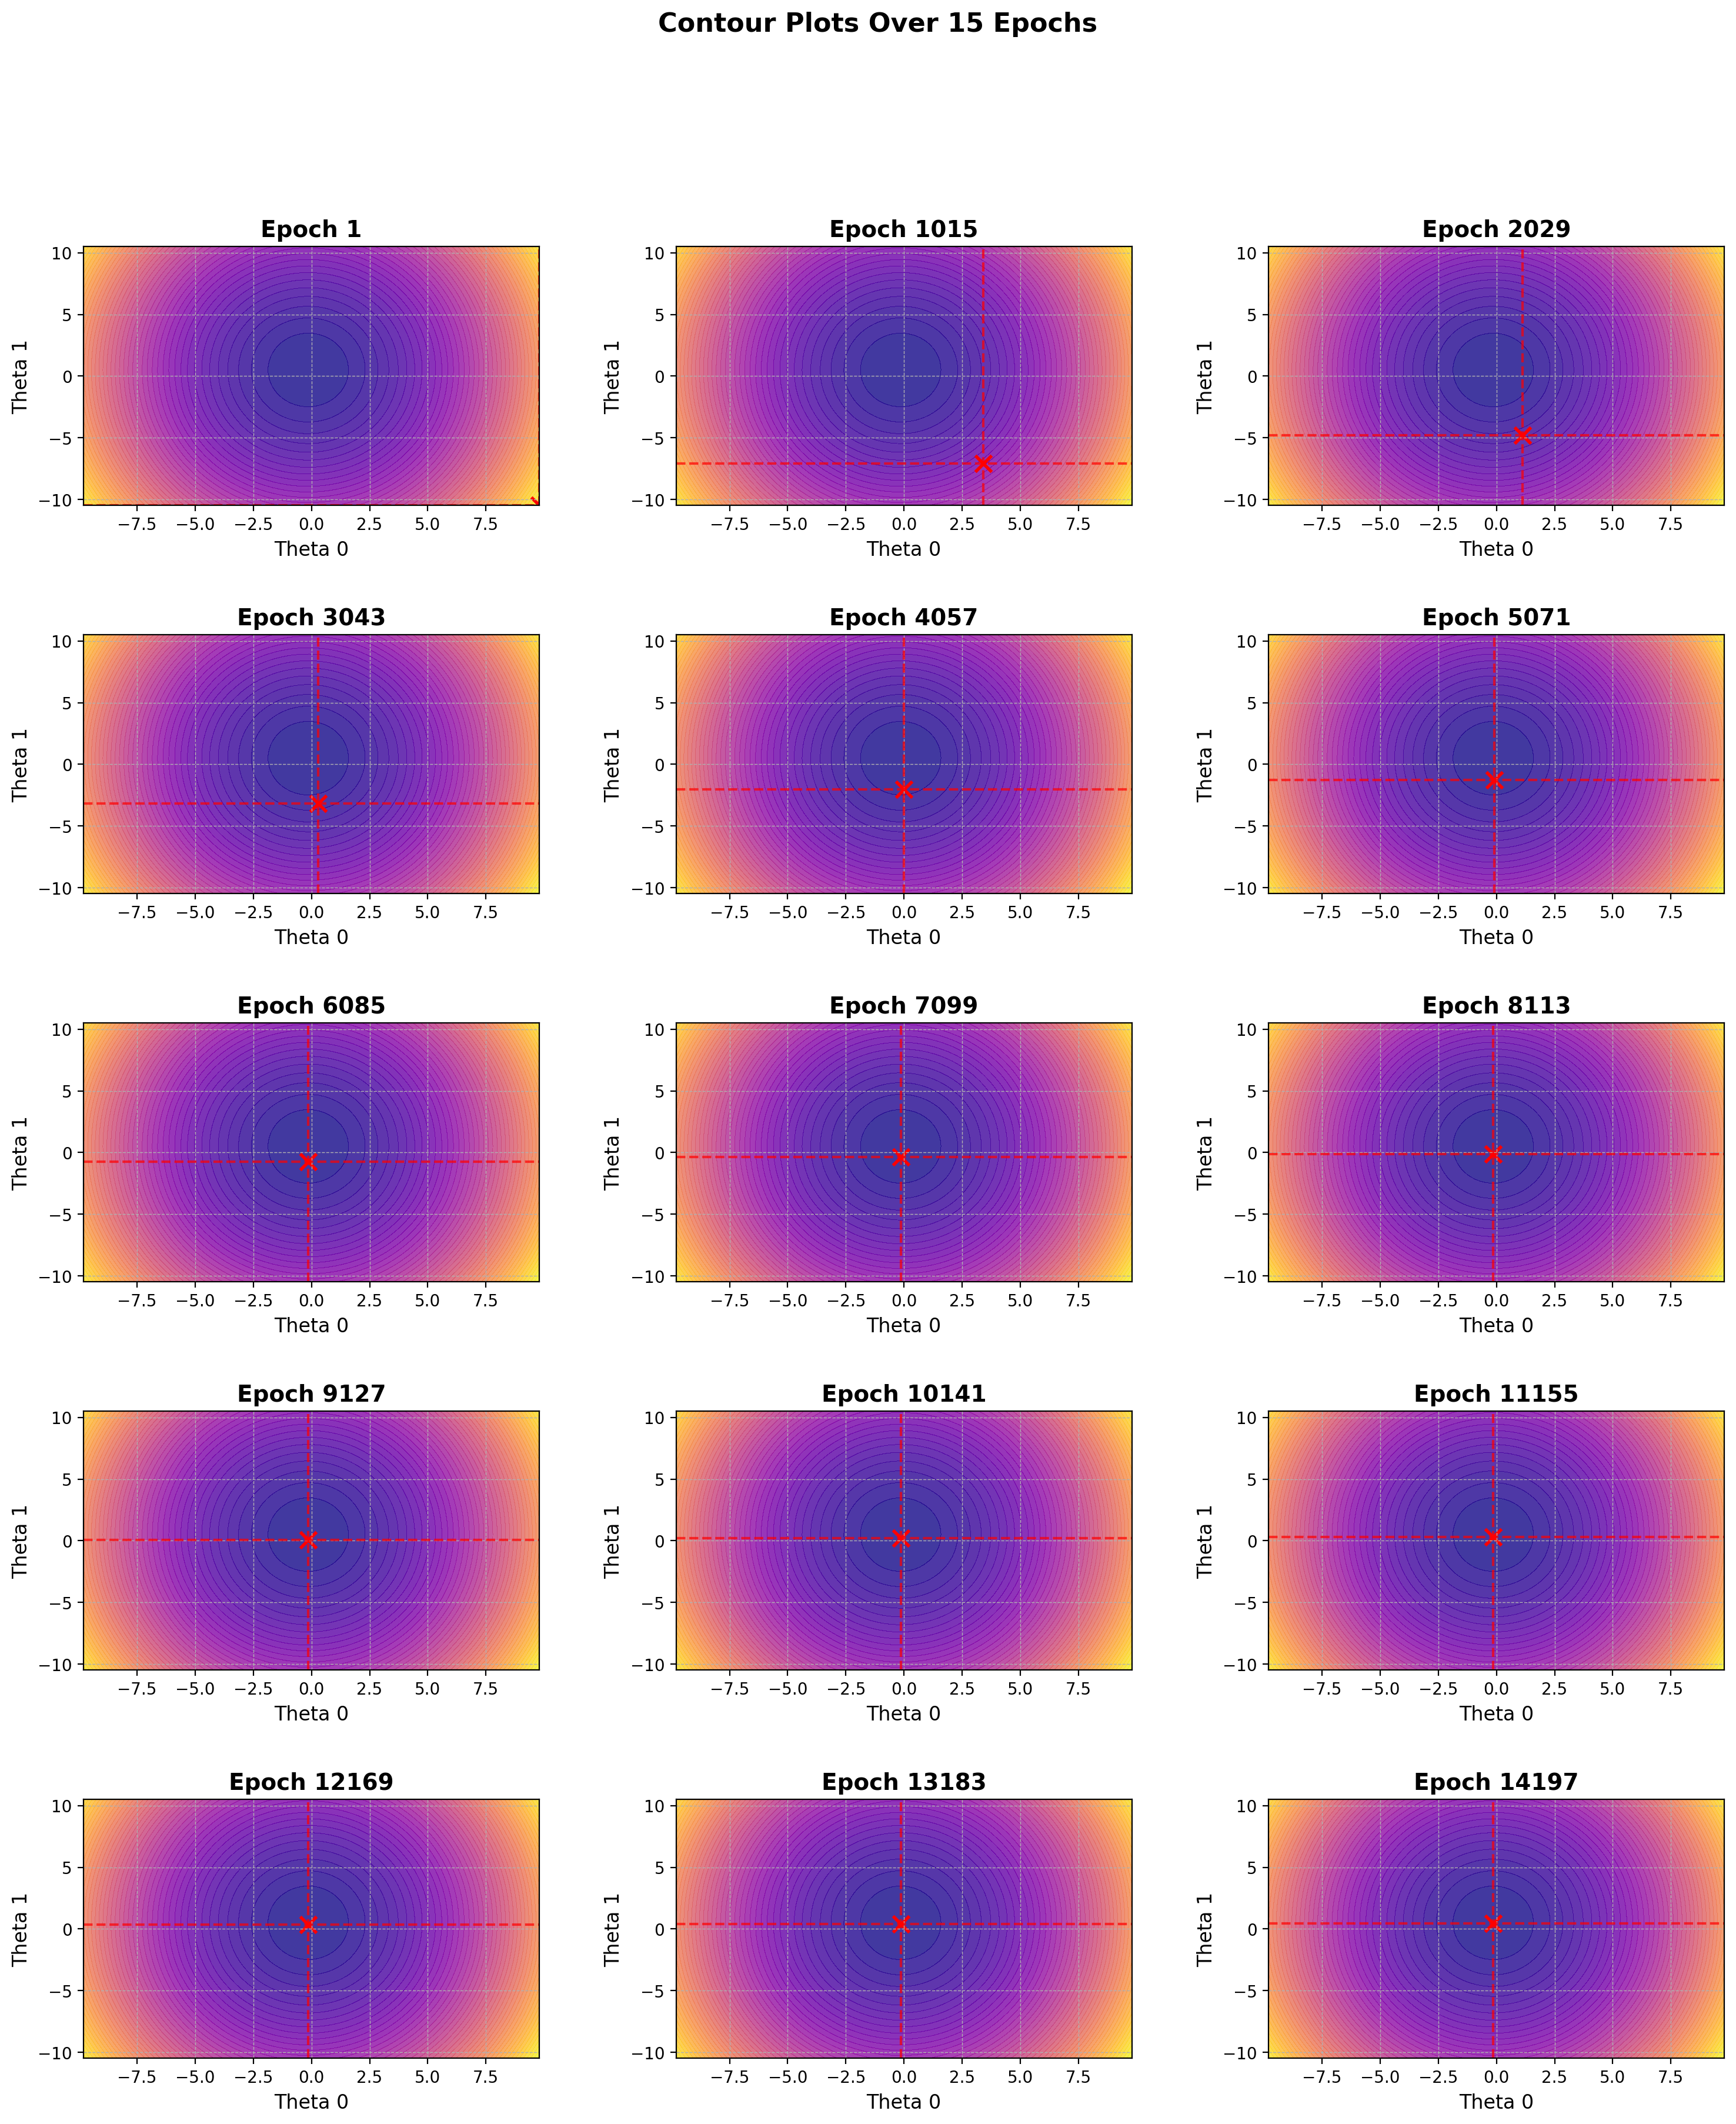

In [117]:
plot_contours(full_grad_thetas,X,y)

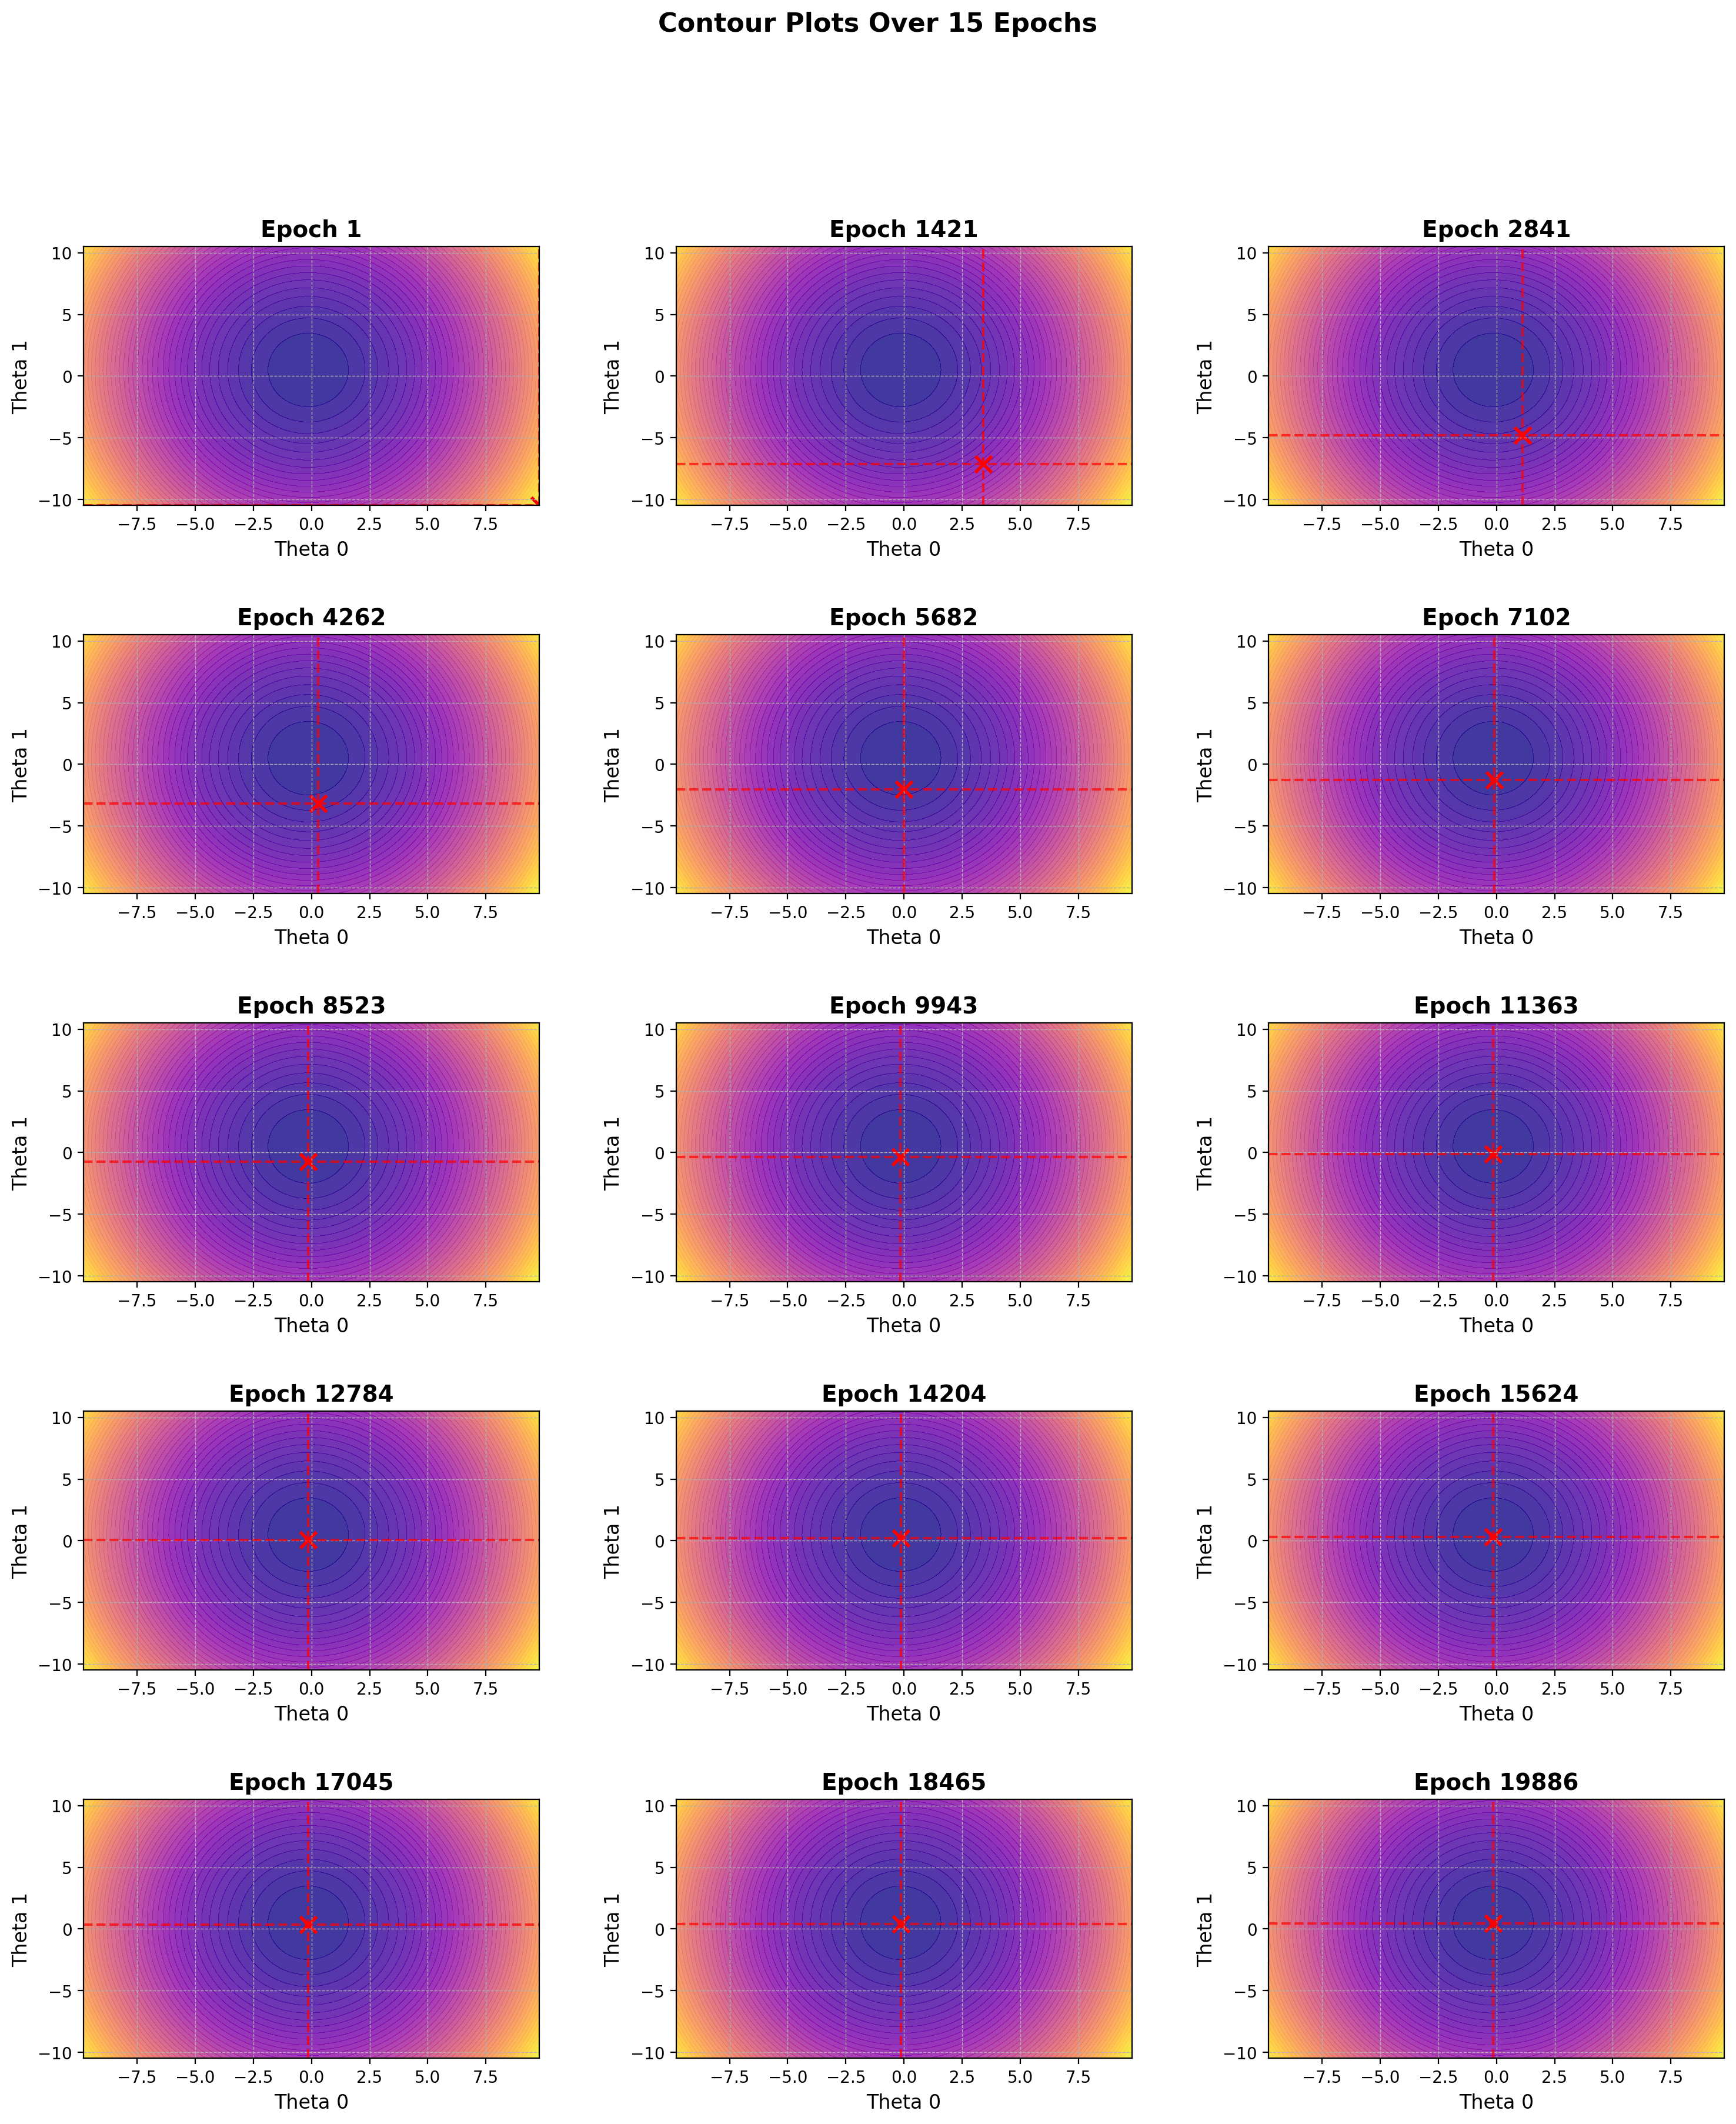

In [118]:
plot_contours(mini_grad_thetas,X,y)

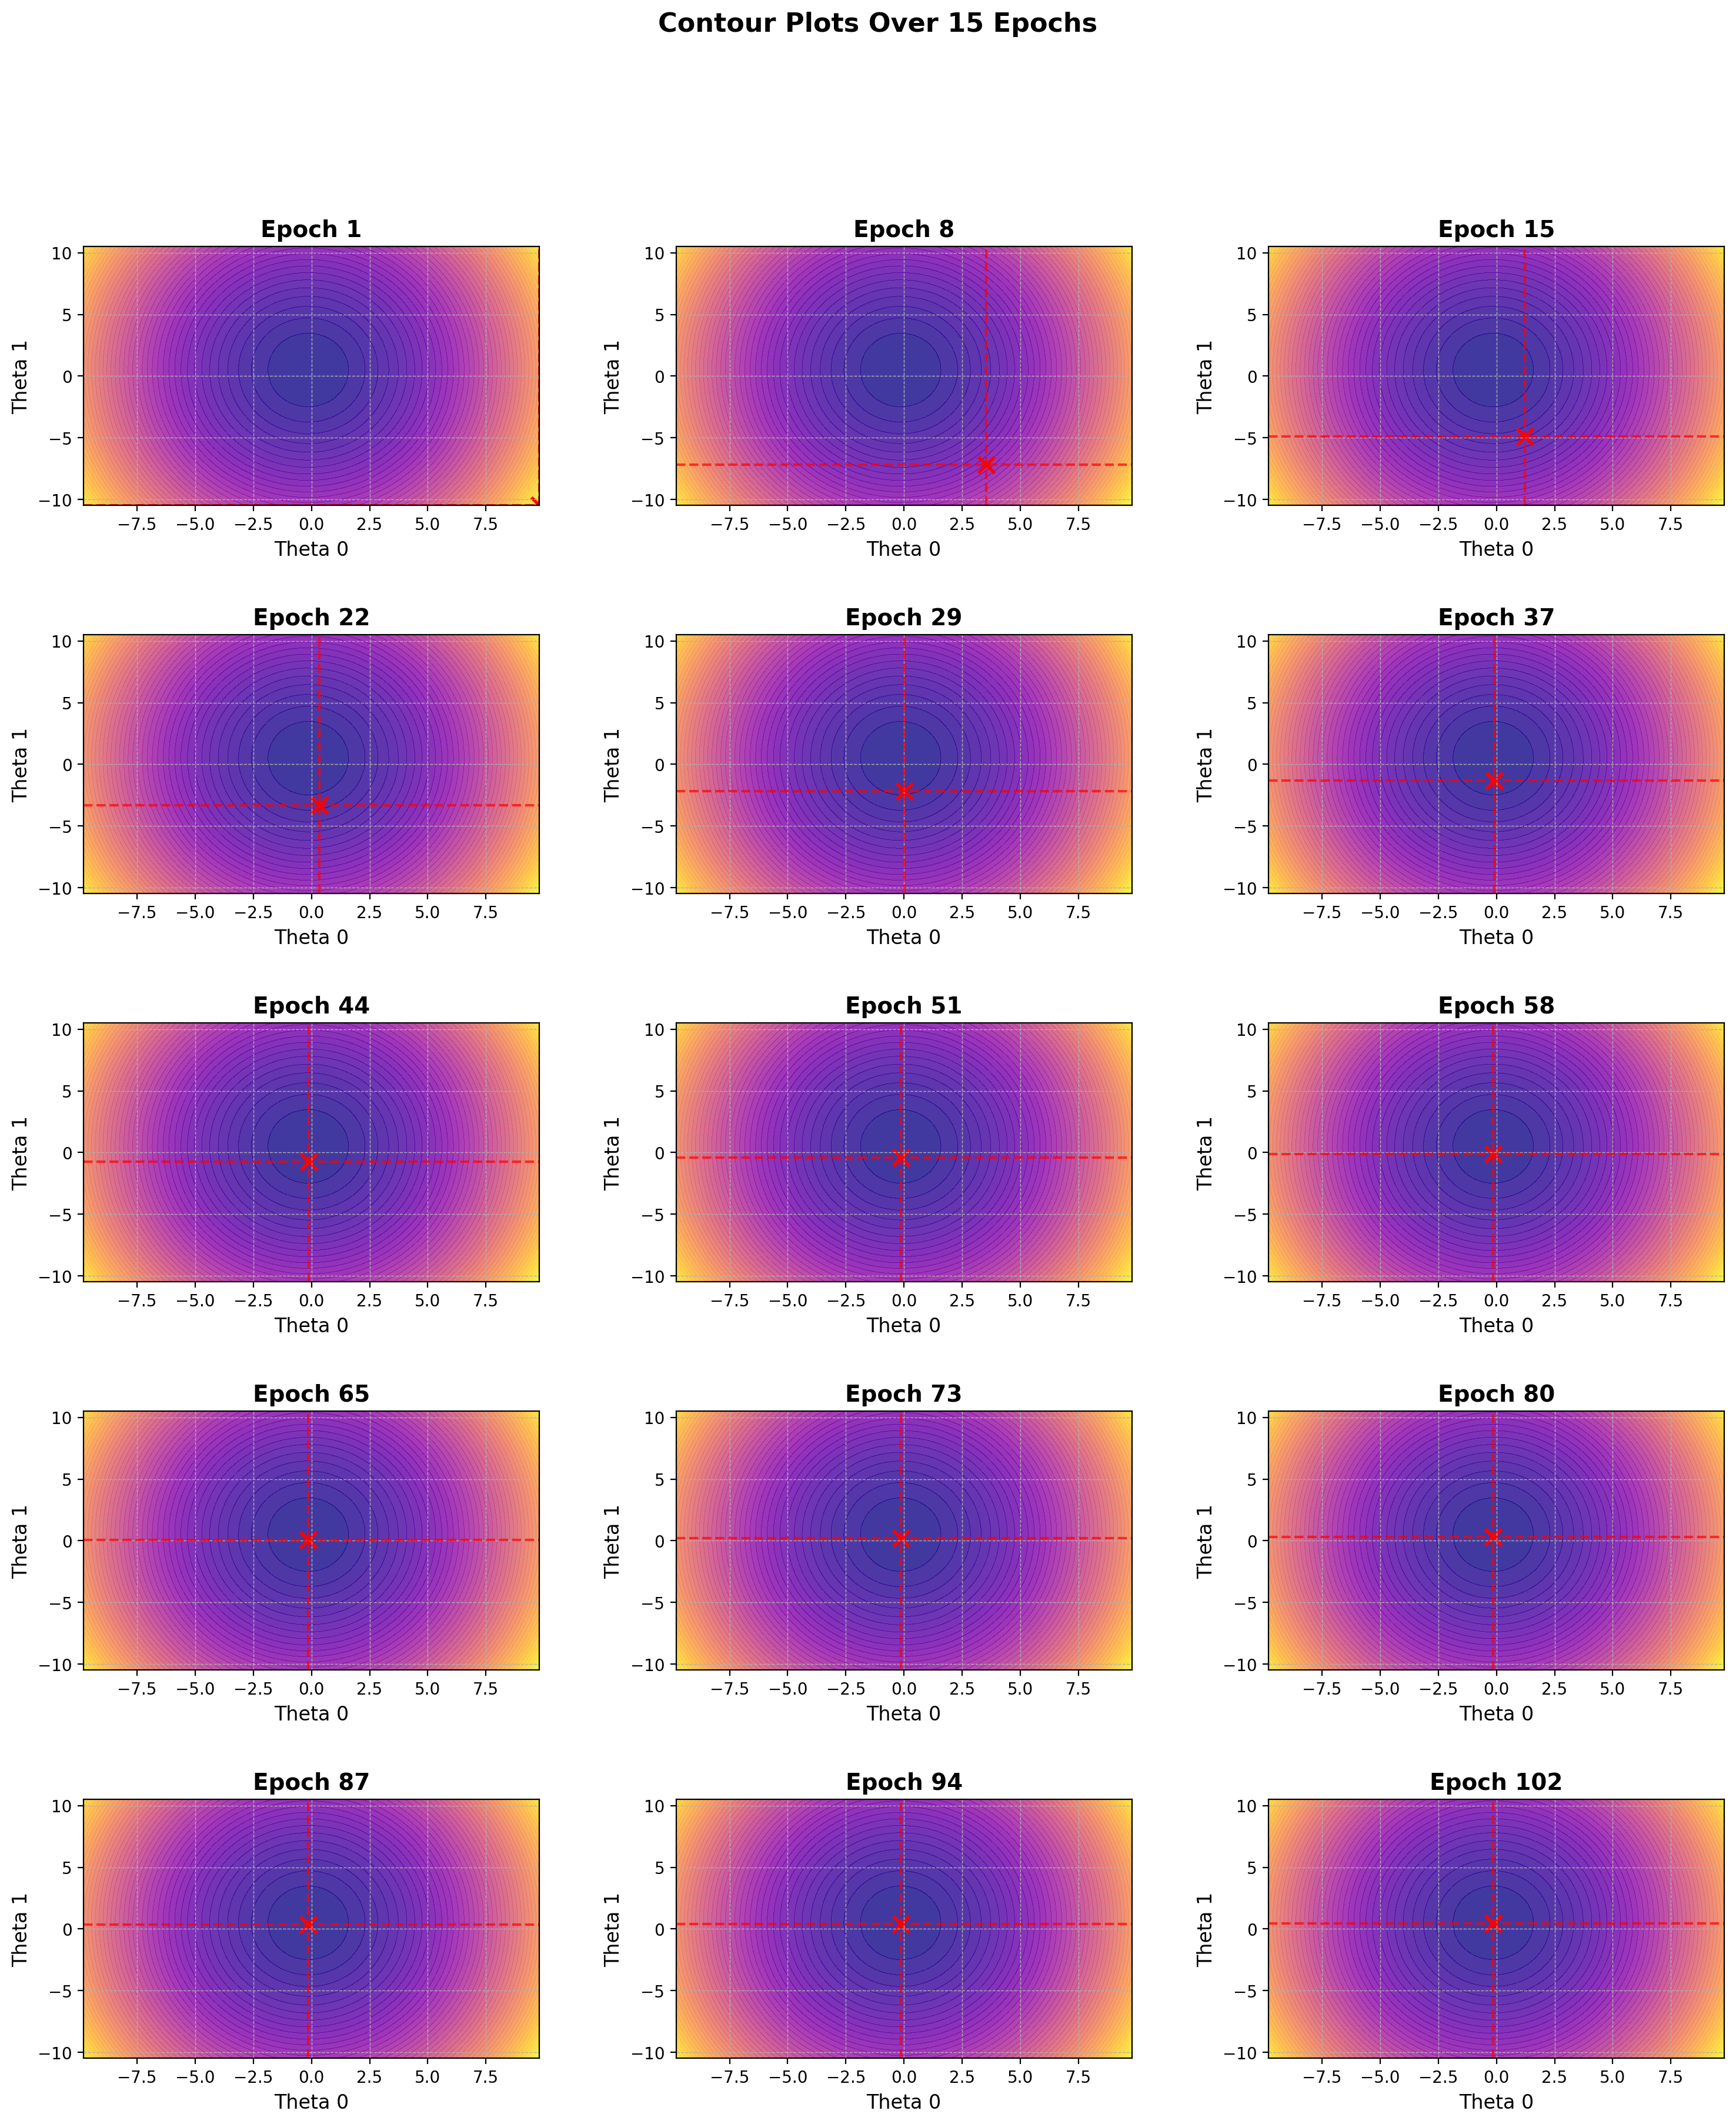

In [119]:
plot_contours(sgd_grad_thetas,X,y)

In [120]:
def plot_loss(loss_histories, labels):
    plt.figure(figsize=(12, 8))
    for loss_history, label in zip(loss_histories, labels):
        plt.plot(np.arange(1, len(loss_history) + 1), loss_history, label=label)
    
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss vs. Epochs for Different Gradient Descent Methods')
    plt.grid(True)
    plt.show()

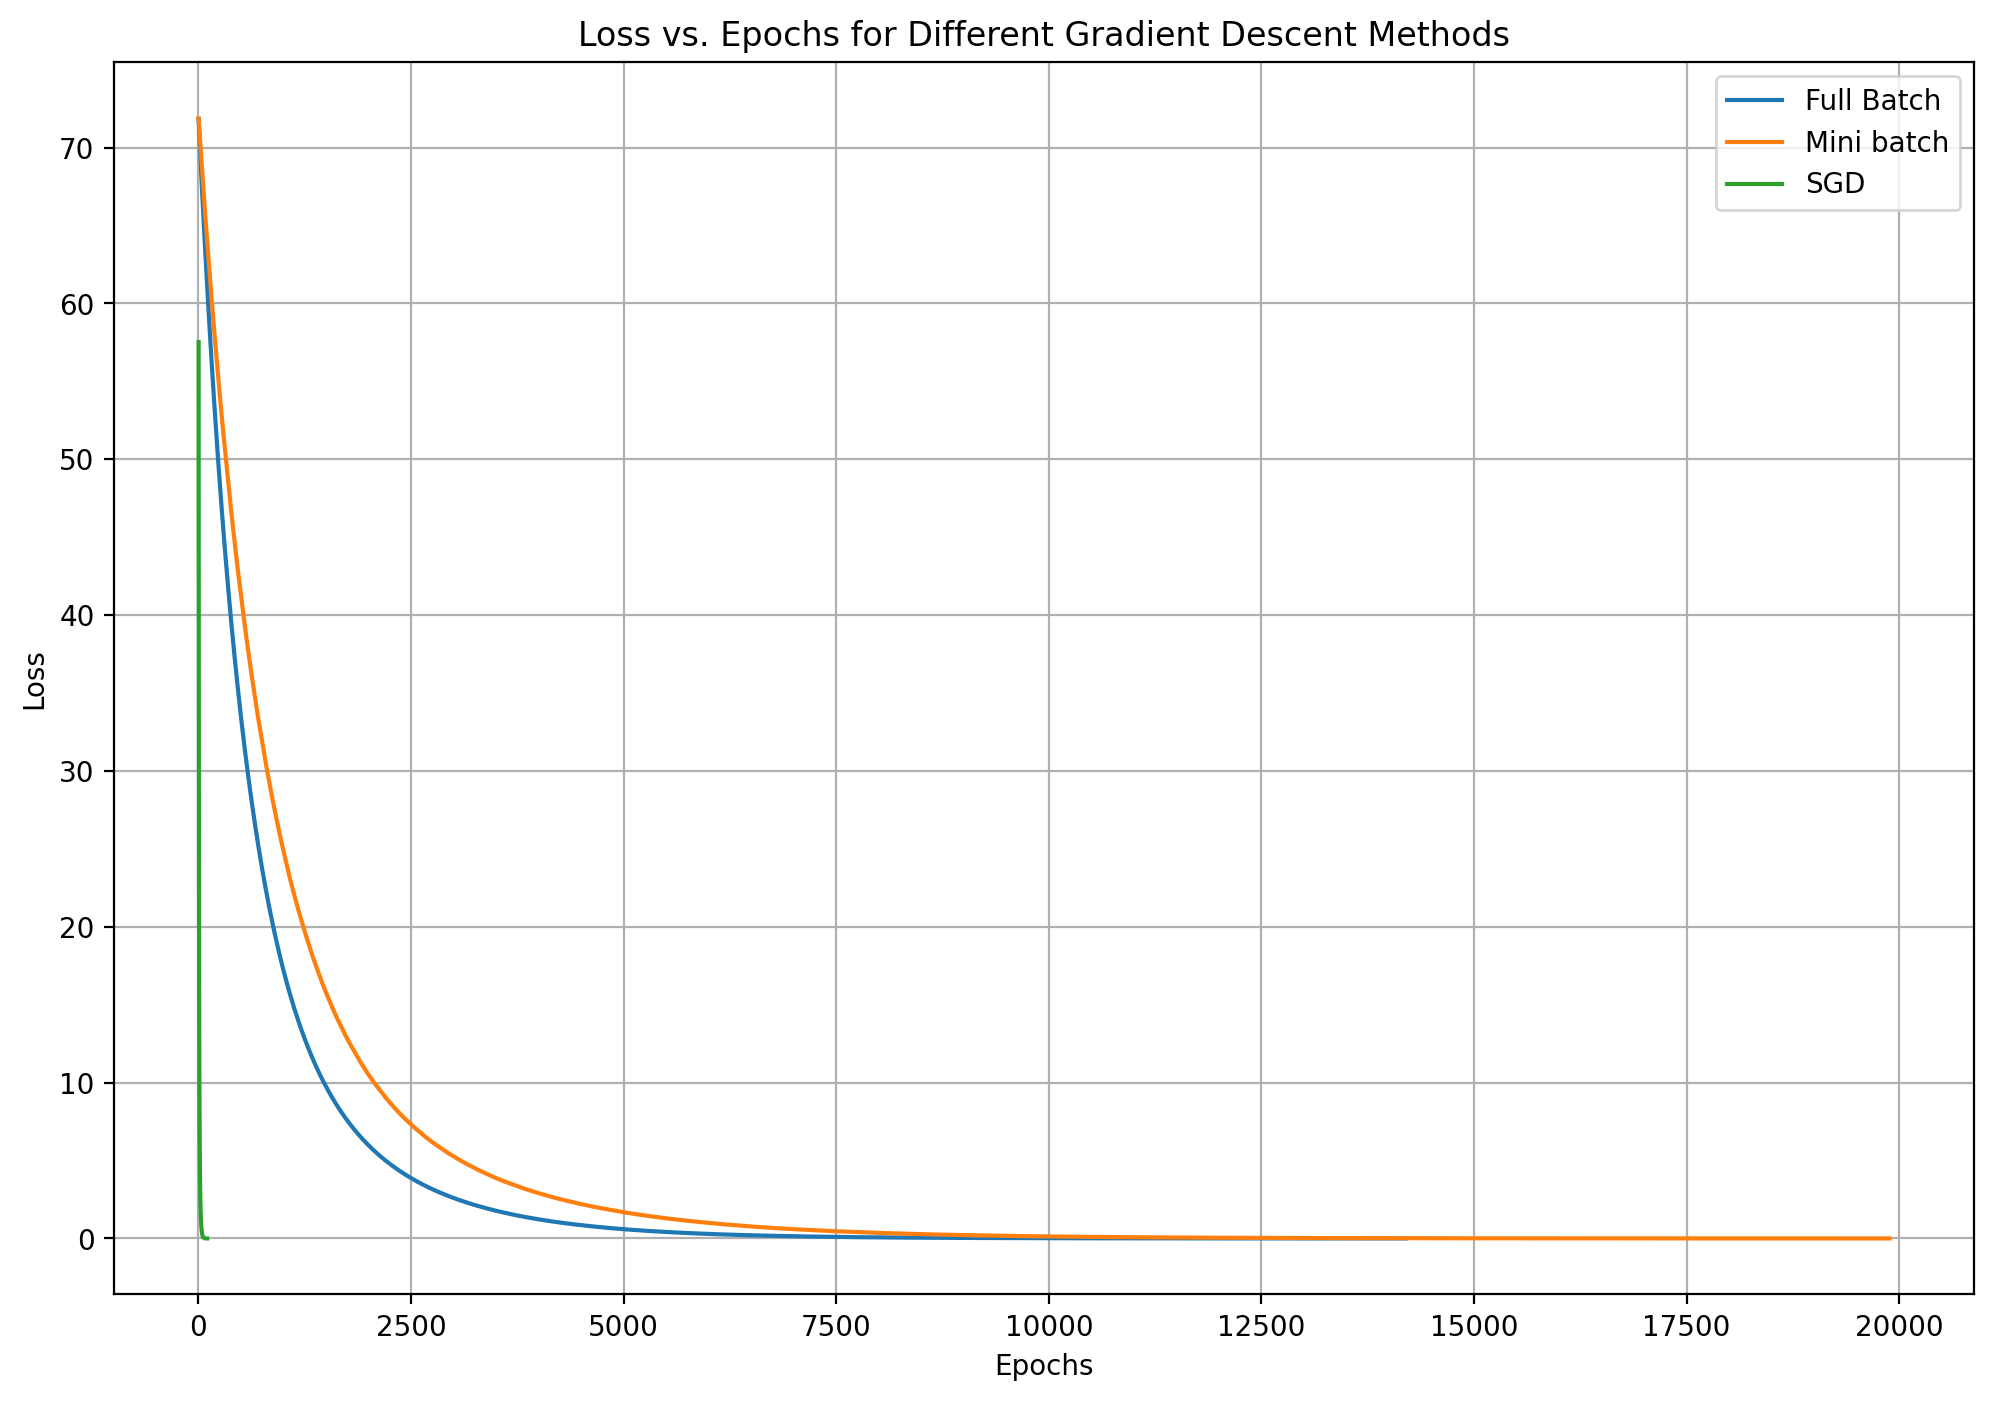

Number of iterations in full batch:	 14196 		Total Iterations:	 50000 		Ratio: 	 0.28392
Number of iterations in mini batch:	 994250 		Total Iterations:	 2500000 	Ratio: 	 0.3977
Number of iterations in sgd grad:	 14179 		Total Iterations:	 10000000 	Ratio: 	 0.0014179


In [121]:
loss_histories = [full_grad_losses,mini_grad_losses,sgd_grad_losses[:len(full_grad_losses)]]
labels = ["Full Batch","Mini batch","SGD"]
plot_loss(loss_histories,labels)

print("Number of iterations in full batch:\t",full_grad_iters,"\t\tTotal Iterations:\t",epochs,"\t\tRatio: \t",full_grad_iters/epochs)
print("Number of iterations in mini batch:\t",mini_grad_iters,"\t\tTotal Iterations:\t",epochs*num_batch,"\tRatio: \t",mini_grad_iters/(epochs*num_batch))
print("Number of iterations in sgd grad:\t",sgd_grad_iters,"\t\tTotal Iterations:\t",epochs*X.shape[0],"\tRatio: \t",sgd_grad_iters/(epochs*X.shape[0]))

# Que 4


Explore the article here on gradient descent with momentum. Implement gradient descent with momentum for the dataset. Visualize the convergence process for 15 steps. Compare the average number of steps taken with gradient descent (for variants full batch and stochastic) with momentum to that of vanilla gradient descent to converge to an ϵ-neighborhood for both dataset. Choose ϵ=0.001. Write down your observations. Show the contour plots for different epochs for momentum implementation. Specifically, show all the vectors: gradient, current value of theta, momentum, etc. 

In [122]:
import numpy as np

def gradient_full_batch_mom(X, y, epochs, alpha=0.001, momentum=0.9, thresh=0.001):
    # N is number of features in X and d is the number of samples 

    N = X.shape[1]
    d = X.shape[0]

    params = []

    theta = np.array([9.8, -10.494])
    past_grad = np.zeros_like(theta)
    y_pred = X @ theta

    J_theta = float('inf')

    losses = []
    iters = 0
    for epoch in range(1, epochs+1):
        if J_theta < thresh:
            params.append(theta.copy())  # Append a copy of theta
            losses.append(J_theta)
            print("Iterations of Full batch GD: ", iters)
            print("Epochs of Full batch GD: ", epoch)
            return params, losses, iters
    
        params.append(theta.copy())  # Append a copy of theta
        losses.append(J_theta)

        if J_theta > thresh:
            iters += 1
        

        y_pred = X @ theta

        gradient = (1 / d) * (X.T @ (y_pred - y))
        past_grad = momentum * past_grad + gradient
        theta -= alpha * past_grad
    
        J_theta = (1 / (2 * d)) * np.sum((X @ theta - y) ** 2)

    print("Iterations of Full batch GD: ", iters)
    print("Epochs of Full batch GD: ", epoch)
    
    return params, losses, iters


In [123]:
def gradient_mini_batch_mom(X,  y, num_batch, epochs, alpha = 0.001, momentum=0.9, thresh = 0.001):
    # N is number of features in X and d is the number of samples 

    N = X.shape[1]
    d = X.shape[0]

    params = []
    theta = np.array([9.8, -10.494])
    past_grad = np.zeros_like(theta)
    
    losses = []
    iters = 0
    J_theta = float('inf')

    for epoch in range(1,epochs):
        params.append(theta.copy())  # Append a copy of theta
        losses.append(J_theta)

        if J_theta < thresh:
            print("Iterations of Mini batch GD: ", iters)
            print("Epochs of Mini batch GD: ", epoch)
            return params, losses, iters

        batches = create_batches(X,y,num_batch)
        for batch in batches: 
            iters+=1              
            x_b = batch[0]
            y_b = batch[1]

            y_hat_b = x_b @ theta
            gradient = (1 / d) * (x_b.T @ (y_hat_b - y_b))
            past_grad = momentum * past_grad + gradient
            theta -= alpha * past_grad


        J_theta = (1 / (2 * d)) * np.sum((X @ theta - y) ** 2)

    print("Iterations of Mini batch GD: ", iters)
    print("Epochs of Mini batch GD: ", epoch)
    
    return params, losses , iters

In [124]:
def gradient_SGD_mom(X, y, epochs, alpha=0.001, momentum=0.9, thresh = 0.001):
    N = X.shape[1]  # Number of features
    d = X.shape[0]  # Number of samples

    params = []
    theta = np.array([9.8, -10.494])
    past_grad = np.zeros_like(theta)

    losses = []
    iters = 0

    J_theta = float('inf')

    for epoch in range(1,epochs):
        params.append(theta.copy())  # Append a copy of theta
        losses.append(J_theta)
        for i in range(d):

            if J_theta > thresh:
                iters += 1

            if J_theta < thresh:
                print("Iterations of SGD: ", iters)
                print("Epochs of SGD: ", epoch)
                return params, losses, iters

            x_i = X[i:i+1]
            y_i = y[i:i+1]
            
            y_hat_i = x_i @ theta
            
            gradient = (x_i.T @ (y_hat_i - y_i))
            past_grad = momentum * past_grad + gradient
            theta -= alpha * past_grad

            J_theta = (1 / (2 * d)) * np.sum((X @ theta - y) ** 2)

    print("Iterations of SGD: ", iters)
    print("Epochs of SGD: ", epoch)
    return params, losses,iters

In [125]:
X, y = make_data(noise=0.02  , degree=1, num_samples=200, random_state=42)

X = np.concatenate([np.ones((X.shape[0],1)),X],axis = 1)

# X = np.concatenate([np.ones((X.shape[0],1)),X, X**2, X**3, X**4], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [126]:
epochs = 50000
epsilon = 0.001

num_batch = 10


full_grad_thetas,full_grad_losses,full_grad_iters = gradient_full_batch(X_train,y_train,epochs,alpha=0.001,thresh=epsilon)
print("-----------------------------------")
mini_grad_thetas,mini_grad_losses,mini_grad_iters = gradient_mini_batch(X_train,y_train,num_batch,epochs,alpha=0.001,thresh=epsilon)
print("-----------------------------------")
sgd_grad_thetas,sgd_grad_losses,sgd_grad_iters = gradient_SGD(X_train,y_train,epochs,alpha=0.001,thresh=epsilon)
print("-----------------------------------")

print("\nUsing Momentum\n")
full_grad_thetas_mom,full_grad_losses_mom,full_grad_iters_mom = gradient_full_batch_mom(X_train, y_train, epochs, alpha=0.001, momentum=0.9, thresh=epsilon)
print("-----------------------------------")
mini_grad_thetas_mom,mini_grad_losses_mom,mini_grad_iters_mom = gradient_mini_batch_mom(X_train, y_train, num_batch, epochs, alpha=0.001, momentum=0.9, thresh=epsilon)
print("-----------------------------------")
sgd_grad_thetas_mom,sgd_grad_losses_mom,sgd_grad_iters_mom = gradient_SGD_mom(X_train, y_train, epochs, alpha=0.001, momentum=0.9, thresh=epsilon)
print("-----------------------------------")


Iterations of Full batch GD:  14196
Epochs of Full batch GD:  14197
-----------------------------------
Iterations of Mini batch GD:  141980
Epochs of Mini batch GD:  14199
-----------------------------------
Iterations of SGD:  14179
Epochs of SGD:  102
-----------------------------------

Using Momentum

Iterations of Full batch GD:  1380
Epochs of Full batch GD:  1381
-----------------------------------
Iterations of Mini batch GD:  14160
Epochs of Mini batch GD:  1417
-----------------------------------
Iterations of SGD:  1370
Epochs of SGD:  10
-----------------------------------


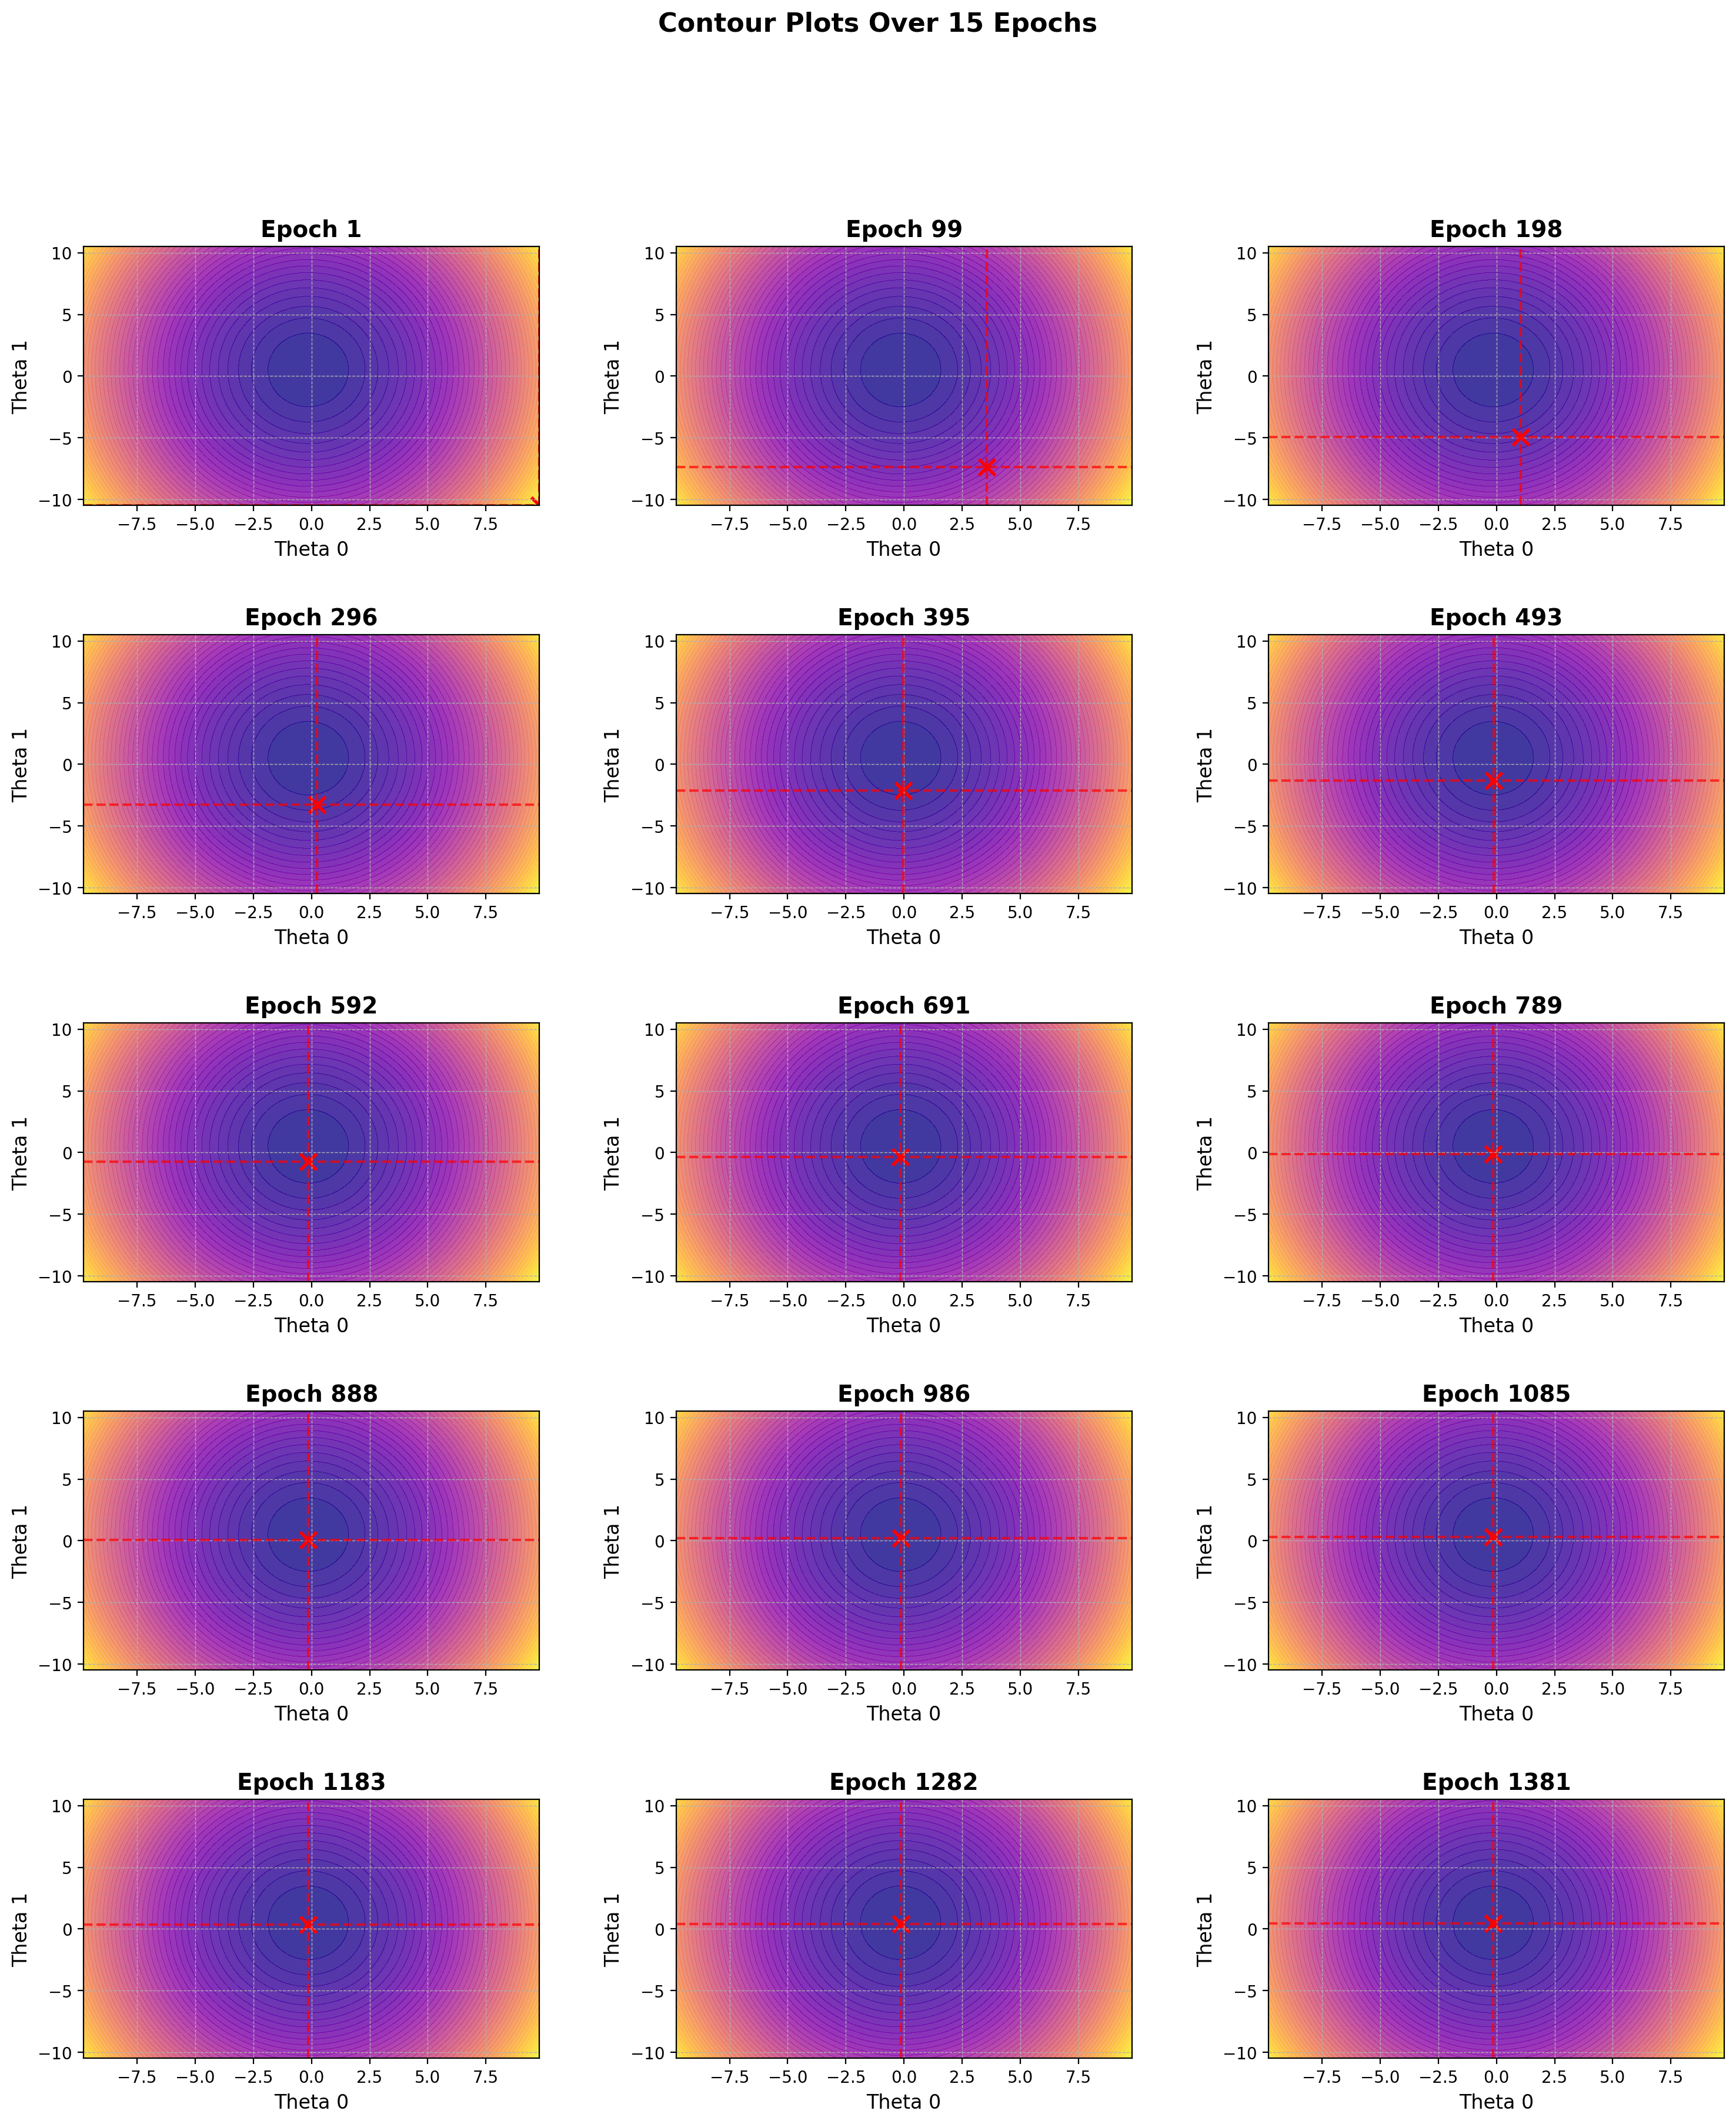

In [127]:
plot_contours(full_grad_thetas_mom,X,y)

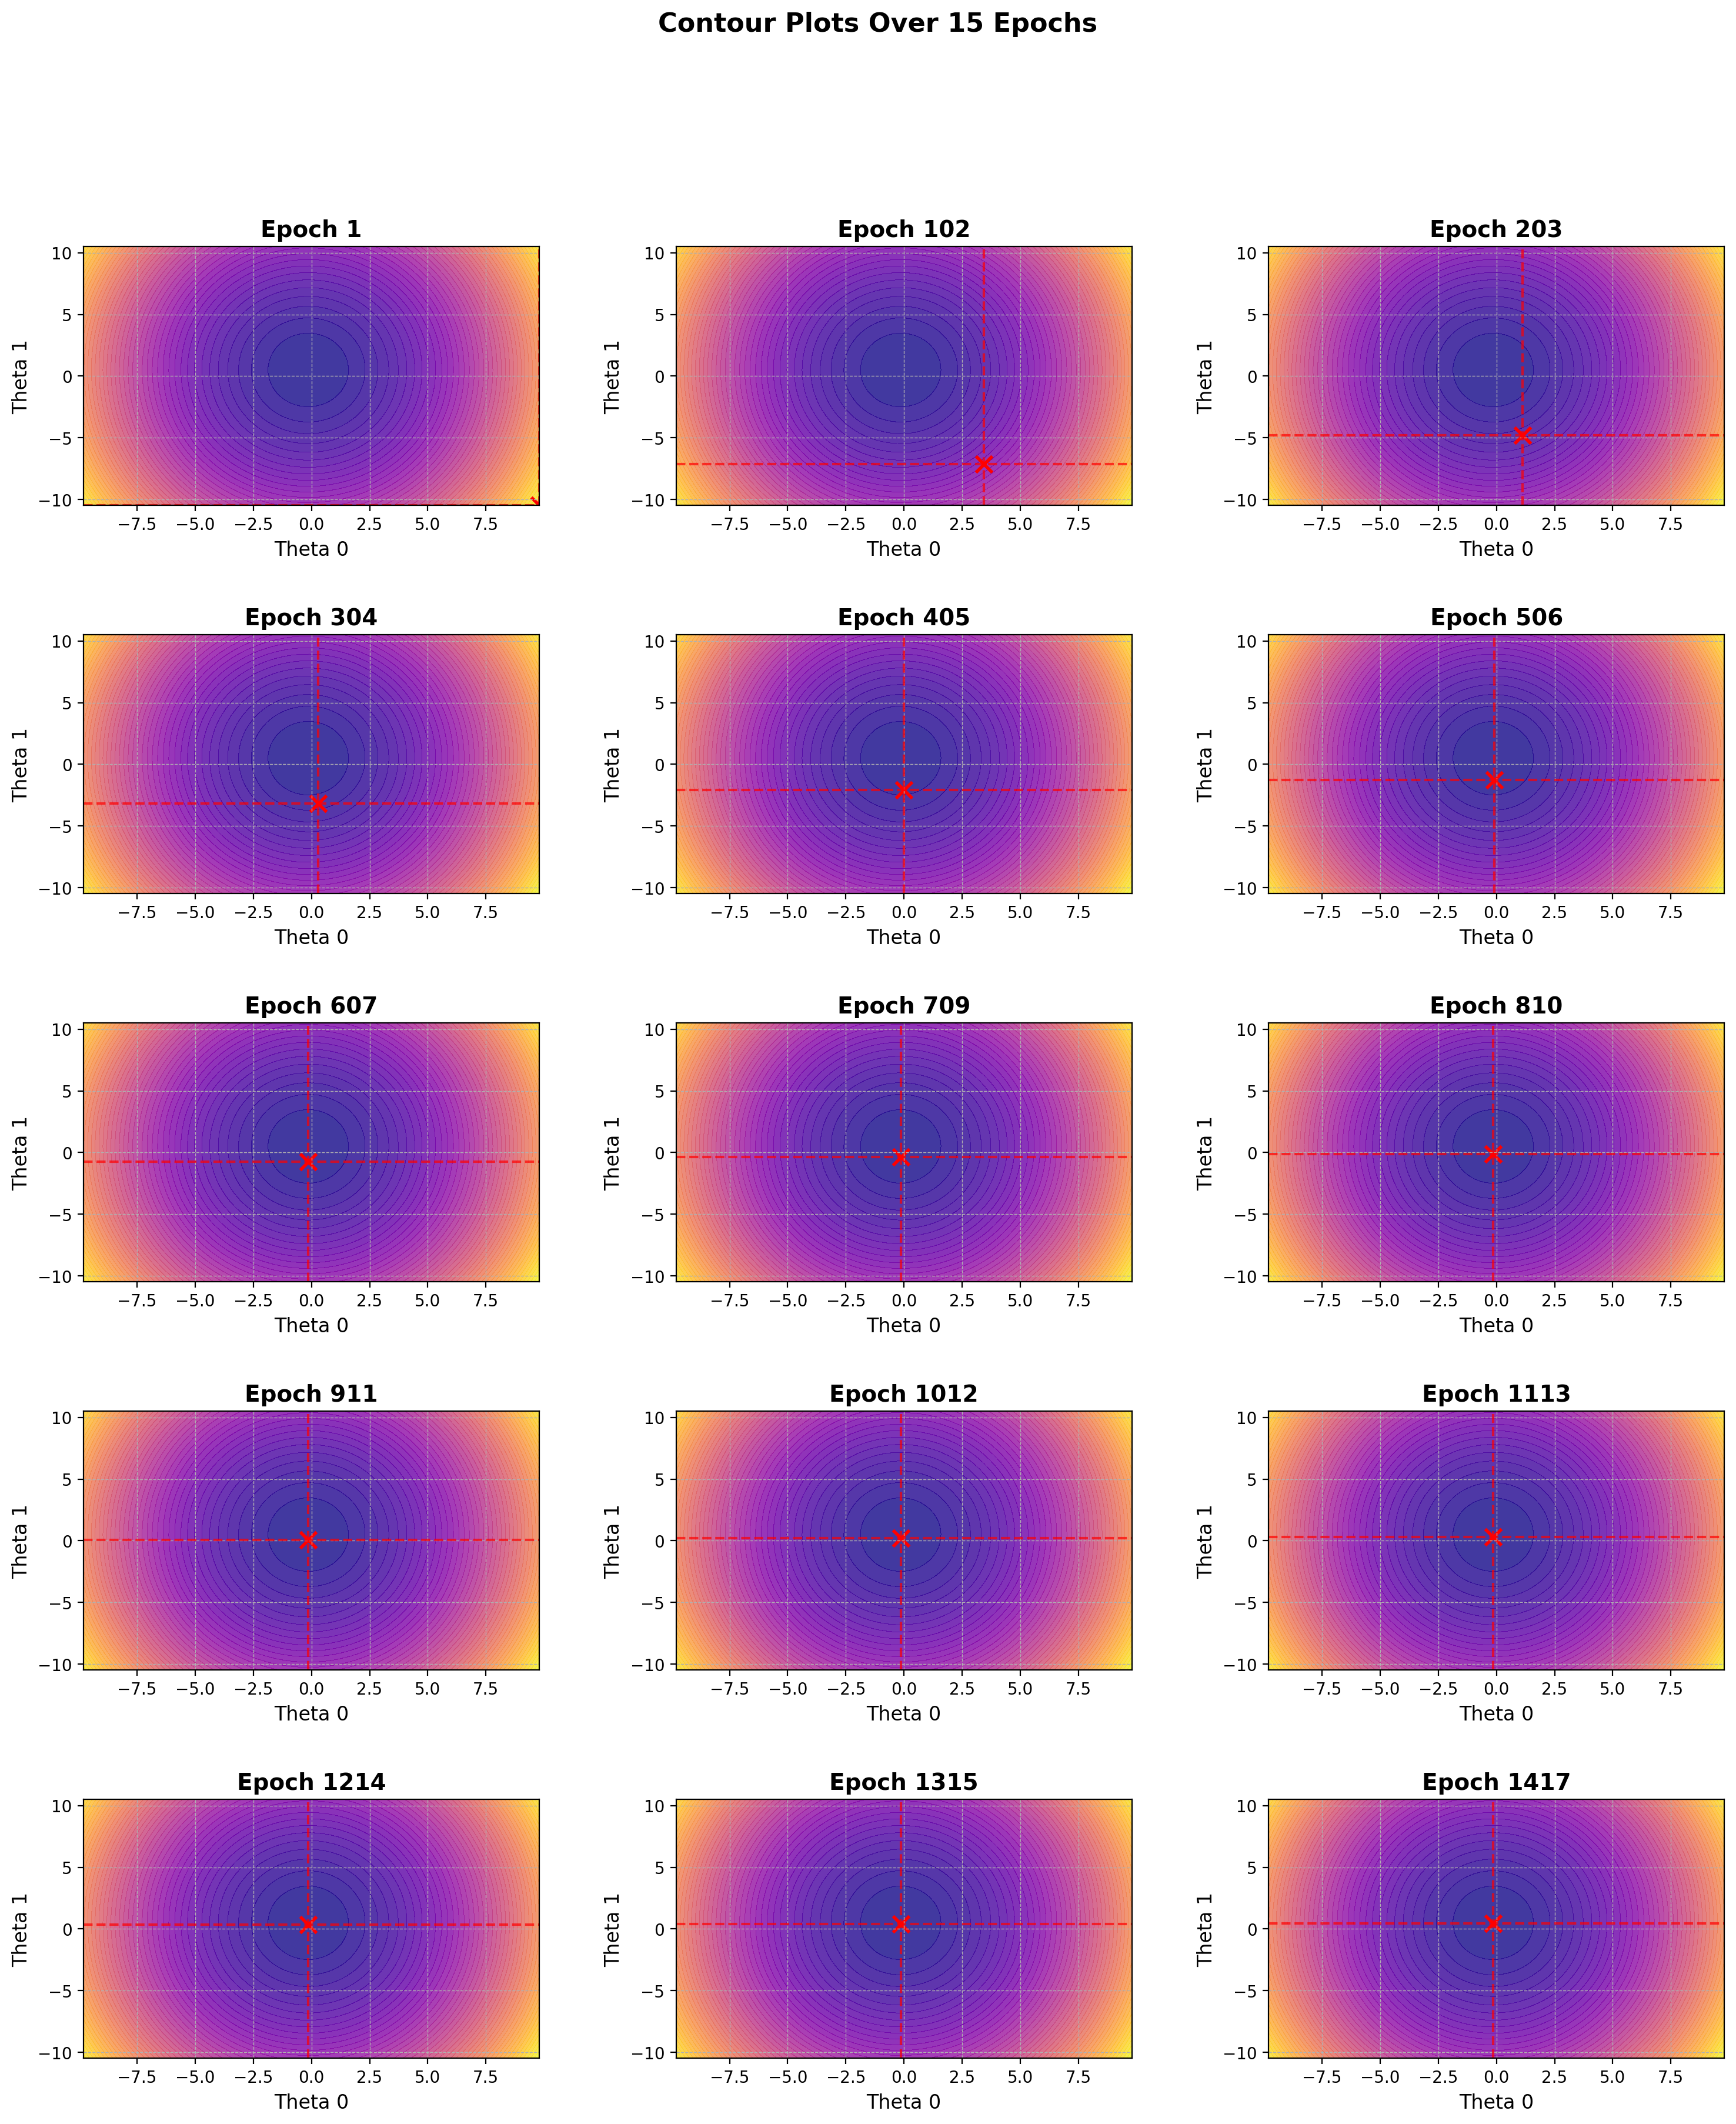

In [128]:
plot_contours(mini_grad_thetas_mom,X,y)

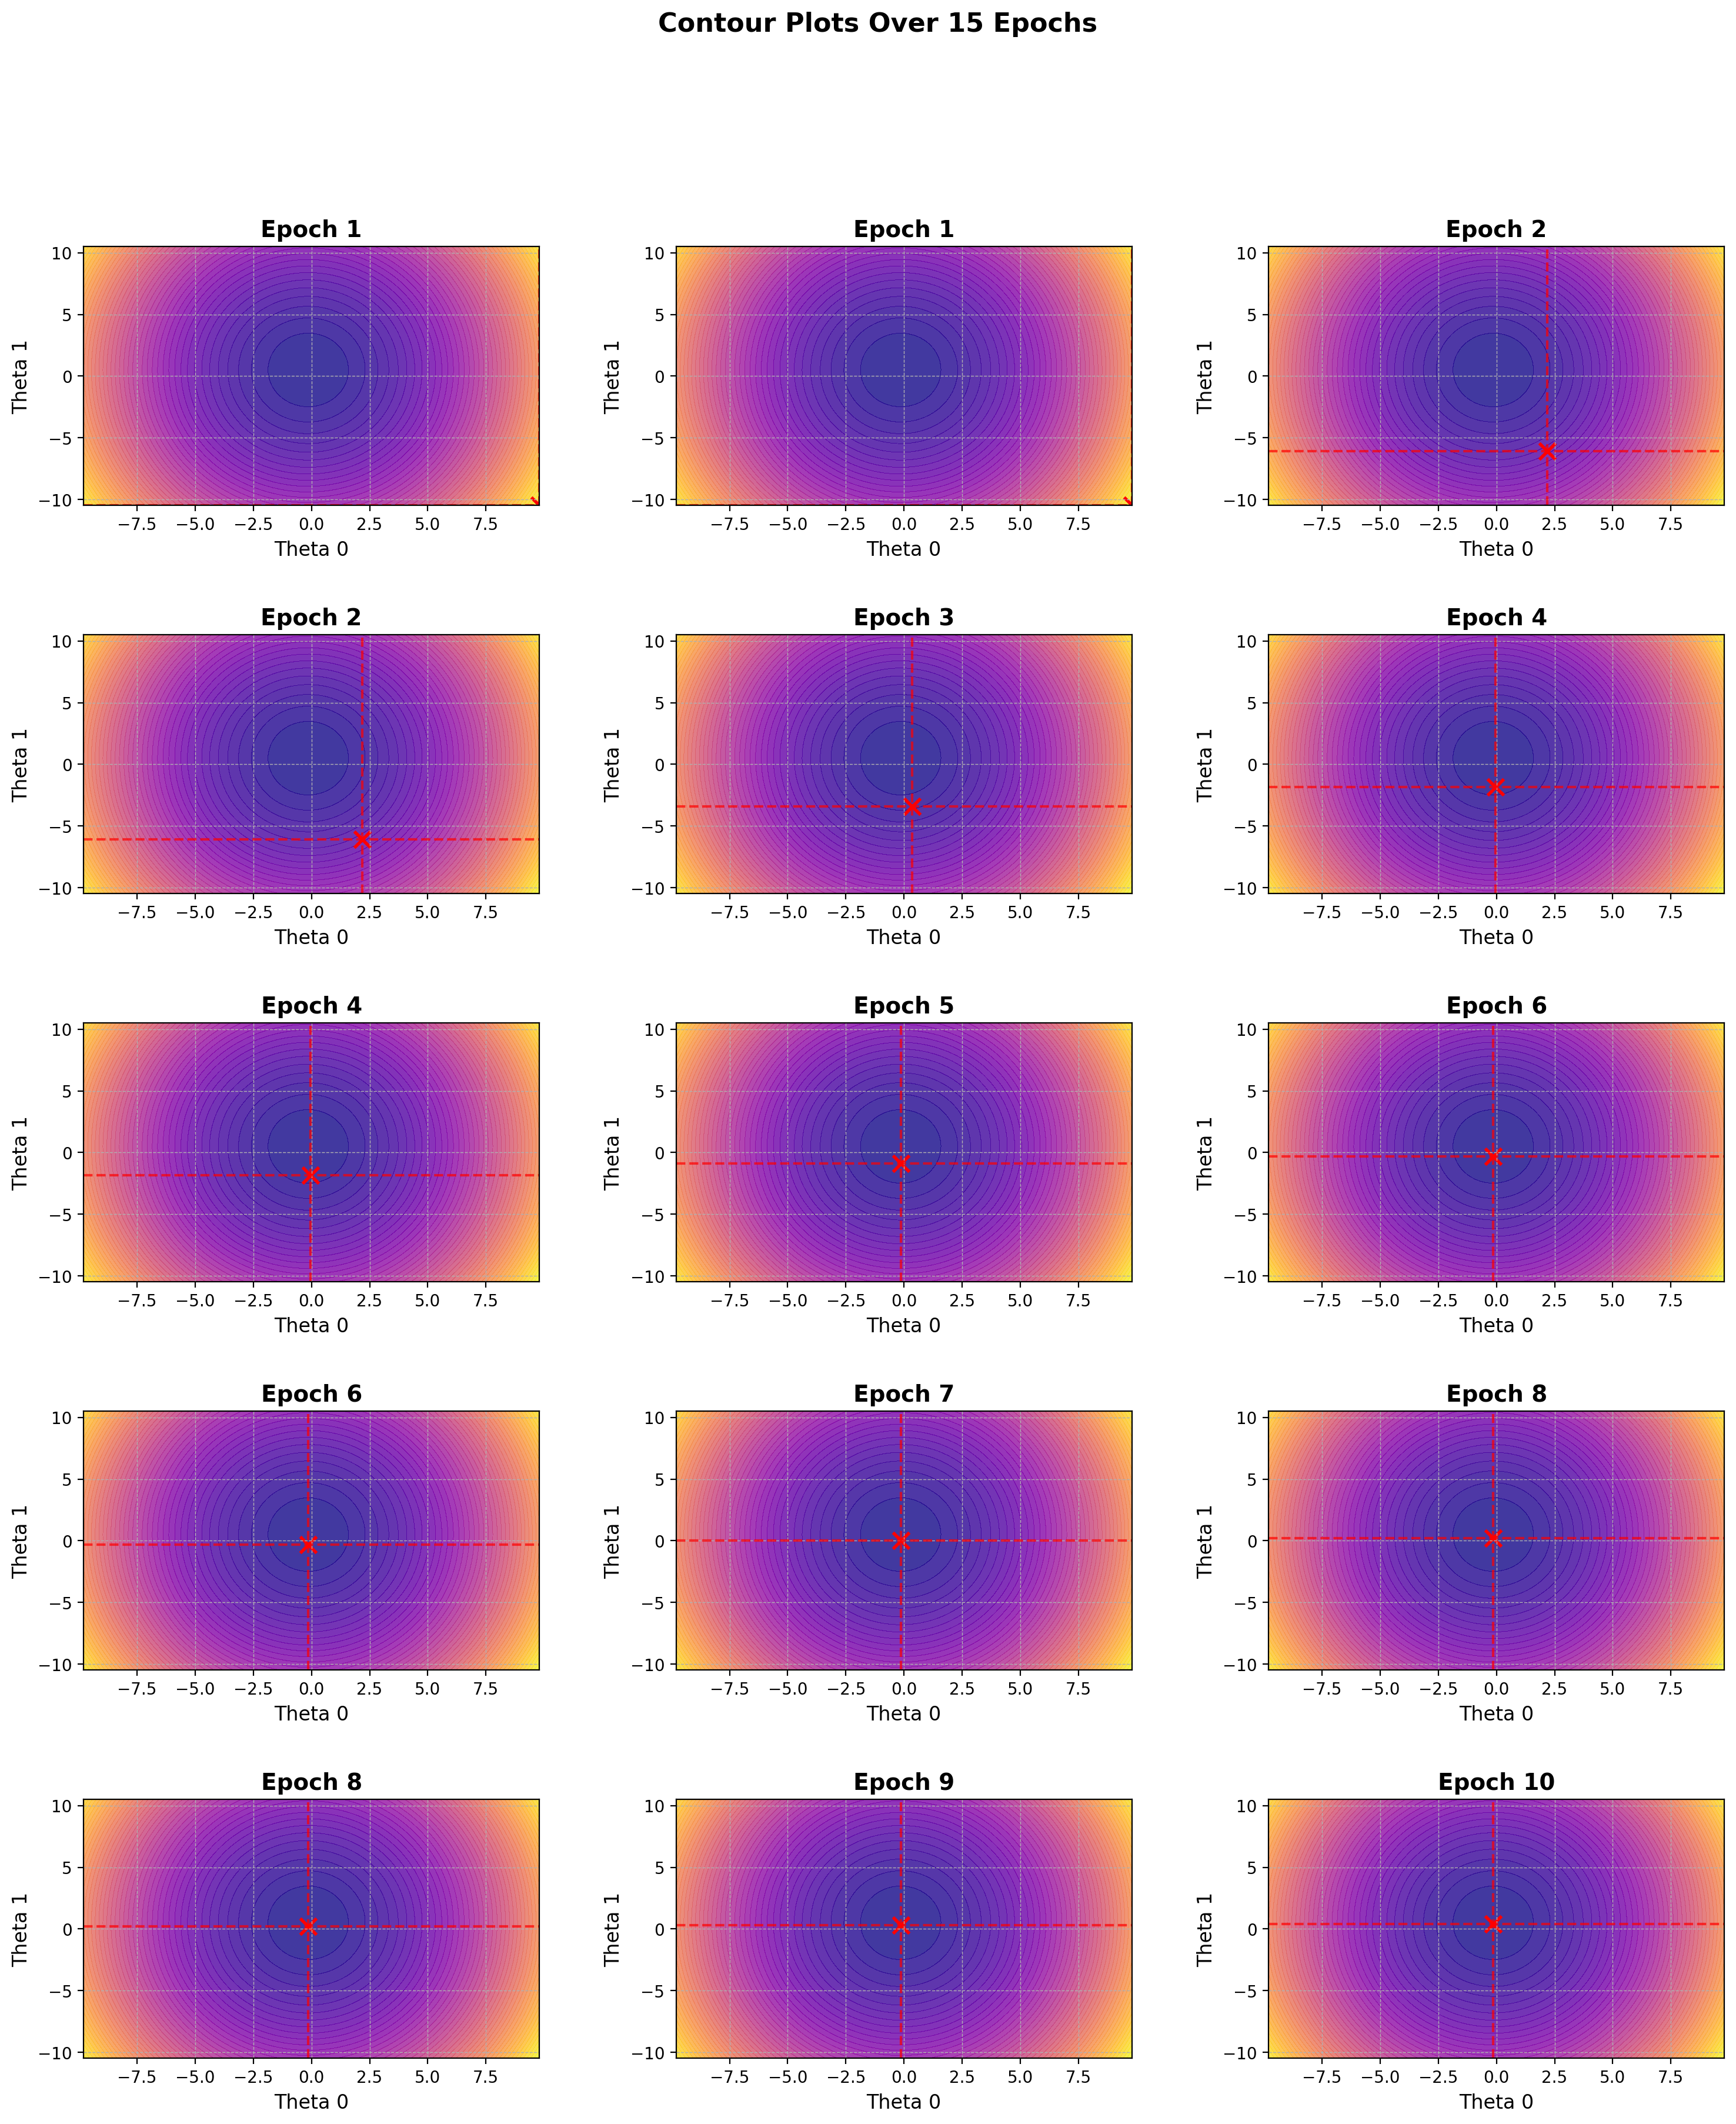

In [129]:
plot_contours(sgd_grad_thetas_mom,X,y)